In [1]:
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [2]:
warnings.filterwarnings("ignore")

In [3]:
pwd = 'D:/gitProject/Modeling/breast-cancer-wisconsin.csv'

In [4]:
#读取数据无列名
df1 = pd.read_csv(pwd,
                  header='infer',
                  names=['Sample_code_number',
                         'Clump_Thickness',
                         'Uniformity_of_Cell_Size',
                         'Uniformity_of_Cell_Shape',
                         'Marginal_Adhesion',
                         'Single_Epithelial_Cell_Size',
                         'Bare_Nuclei',
                         'Bland_Chromatin',
                         'Normal_Nucleoli',
                         'Mitoses',
                         'Class'])

In [5]:
#异常值剔除
df1 = df1[df1['Bare_Nuclei'] != '?']

In [6]:
df1.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
len(df1)

683

In [8]:
#划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(df1[['Clump_Thickness',
        'Uniformity_of_Cell_Size',
        'Uniformity_of_Cell_Shape',
        'Marginal_Adhesion',
        'Single_Epithelial_Cell_Size',
        'Bare_Nuclei',
        'Bland_Chromatin',
        'Normal_Nucleoli',
        'Mitoses']], df1['Class'], test_size=0.2, random_state=2795)

In [9]:
# 对数据进行归一化处理
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)

In [10]:
param_grid = {
    'random_state': [10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_depth': range(1,5),
    'min_samples_leaf': range(2,30)
}

In [11]:
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=10)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(3, 30), 'random_state': [10],
                         'splitter': ['random', 'best']})

In [12]:
#最佳预估器
best_estimator = grid_search.best_estimator_
best_estimator

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=10, splitter='random')

In [13]:
##训练集最佳结果
best_score = grid_search.best_score_
best_score

0.9634343434343433

In [14]:
#预测分类
y_predict=grid_search.predict(X_test_std)
y_predict

array([2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4,
       4, 2, 2, 2, 2], dtype=int64)

In [15]:
#测试集准确率
score = best_estimator.score(X_test_std, y_test)
score

0.948905109489051

In [16]:
feature_name = ['Clump_Thickness',
                'Uniformity_of_Cell_Size',
                'Uniformity_of_Cell_Shape',
                'Marginal_Adhesion',
                'Single_Epithelial_Cell_Size',
                'Bare_Nuclei',
                'Bland_Chromatin',
                'Normal_Nucleoli',
                'Mitoses']
class_name = ['Benign', 'Malignant']

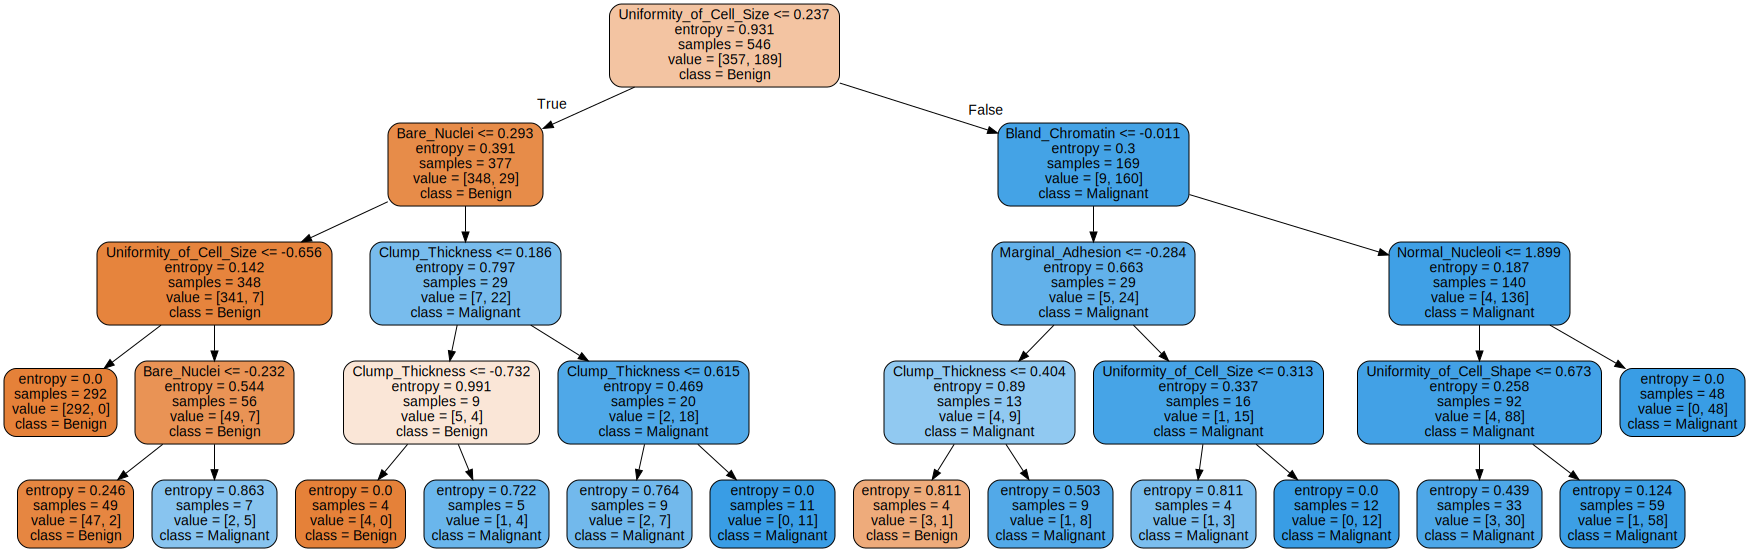

In [17]:
dot_data = export_graphviz(best_estimator
                           ,feature_names = feature_name
                           ,class_names = class_name
                           ,filled=True
                           ,rounded=True
                          )  
graph = graphviz.Source(dot_data)
graph